In [1]:
shhh <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
shhh({
library(tidyverse); 
library(lubridate); 
library(scales);
library(magrittr); 
library(dplyr);
})

In [94]:
library(IRdisplay)

display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

In [3]:
options(repr.plot.width = 15, repr.plot.height = 10)

# Logged Out Users Pre and Post  Language Switching Deployment Analysis

**Jennifer Wang, Staff Data Scientist, Wikimedia Foundation**

**13 November 2021**

# Table of Contents
1. [Introduction](#Introduction)
2. [Purpose](#Purpose)
3. [Methodology](#Methodology)
4. [New Language Button Clicks](#New-Language-Button-Clicks)
5. [Language Link Clicks](#Language-Link-Clicks)
6. [Input Language Link Clicks](#Input-Language-Link-Clicks)

# Introduction
As a part of the [Desktop Improvements project](https://www.mediawiki.org/wiki/Reading/Web/Desktop_Improvements), The Wikimedia Foundation's [Web team](https://www.mediawiki.org/wiki/Readers/Web/Team)  is introducing a new way to switch to a different language wiki. The original language list appears on the sidebar. The new solution replaces the original one by providing 1) a language option button on the top of the page, 2) Selecting the language button will open the list of languages that will contain the suggested languages for each user, as well as a full list of all available languages for that article.
You can find more information on this change and other feature deployments on the [Language switching project page](https://www.mediawiki.org/wiki/Reading/Web/Desktop_Improvements/Features/Language_switching).

**Previous analyses**  
[AB test analysis on logged-in users](https://nbviewer.org/github/jenniferwang-wmf/Web_language_switch/blob/master/Language_switching_logout_user_before_after_report.ipynb)  done in September, 2021.  
[Pre/post analysis on logged-out users](https://nbviewer.org/github/jenniferwang-wmf/Web_language_switch/blob/master/Language_switching_logout_user_before_after_report.ipynb)  done in September, 2021


# Purpose

The goal of this post analysis is: 
- to confirm the instrumentation issue discovered by engineer in [T291285](https://phabricator.wikimedia.org/T291285)

- to monitor the adoption trend 4 months after new language deployment on pilot wikis. Our hypothesis is that after the feature was available for several month, more users will adopt the new language feature. The clicks of the new button and language links will grow.

# Methodology

We reviewed the total number of clicks on language links and input language links on pilot wikis separately. We did not review the number of clicks on interface language links because it’s only available for logged-in users not for logged-out users. 

We selected the 7 days before the deployment as the pre deployment period. Post period analysis reviewed the total number of clicks from 2021-10-25 to 2021-10-31. 
 
The clicks on input language links within 7 days are too few to show a consistent trend. We don't analyze it statistically. 



# New Language Button Clicks

In [3]:
# number of clicks on new button 
query_new_button <- "
SELECT
    TO_DATE(dt) as button_date,
    wiki as wiki,
    count(1) AS new_button_clicks
FROM event_sanitized.universallanguageselector
WHERE
    year = 2021 and month in (6,7,8,9,10) 
    AND CONCAT(year,LPAD(month,2,'0'),LPAD(day,2,'0')) between '20210601' and '20211031'
 --   AND wiki in ('frwiktionary', 'hewiki', 'ptwikiversity', 'frwiki', 
 --  'euwiki', 'fawiki', 'ptwiki', 'kowiki', 'trwiki', 'srwiki', 'bnwiki', 'dewikivoyage', 'vecwiki')
-- only anonymous users
    AND event.isanon = true
    AND event.action = 'compact-language-links-open'
    AND event.context = 'header'
    AND event.skinVersion = 'latest'
GROUP BY 
    TO_DATE(dt),
    wiki
"

In [4]:
df_new_button_clicks <-  wmfdata::query_hive(query_new_button)

Don't forget to authenticate with Kerberos using kinit



Data sanity check by taking French Wikipedia as a example.

In [5]:
arrange( filter(df_new_button_clicks, (wiki=='frwiki')&(button_date>'2021-09-01')), button_date)

button_date,wiki,new_button_clicks
<chr>,<chr>,<int>
2021-09-02,frwiki,77523
2021-09-03,frwiki,74646
2021-09-04,frwiki,59191
2021-09-05,frwiki,66992
2021-09-06,frwiki,86422
2021-09-07,frwiki,85912
2021-09-08,frwiki,87364
2021-09-09,frwiki,88069
2021-09-10,frwiki,83201


In [6]:
write_csv(arrange( filter(df_new_button_clicks, (wiki=='frwiki')&(button_date>'2021-09-01')), button_date), file = 'Data_out/new_button_clicks_fr.csv')

In [7]:
df_new_button_clicks$button_date <- as.Date(df_new_button_clicks$button_date)

In [9]:
df_new_button_clicks <- df_new_button_clicks %>%
mutate(
wiki_name = case_when( #clarfiy Wiki project names
        wiki == 'frwiktionary' ~ "French Wikitionary",
        wiki == 'hewiki' ~ 'Hebrew Wikipedia',
        wiki == 'ptwikiversity' ~ 'Portuguese Wikiversity',
        wiki == 'frwiki'~ "French Wikipedia",
        wiki == 'euwiki' ~ "Basque Wikipedia",
        wiki == 'fawiki' ~ 'Persian Wikipedia',
        wiki == 'ptwiki' ~ 'Portuguese Wikipedia',
        wiki == 'kowiki' ~ 'Korean Wikipedia',
        wiki == 'trwiki' ~ 'Turkish Wikipedia',
        wiki == 'srwiki' ~ 'Serbian Wikipedia',
        wiki == 'bnwiki' ~ 'Bengali Wikipedia',
        wiki == 'dewikivoyage' ~ 'German Wikivoyage',
        wiki == 'vecwiki' ~ 'Venetian Wikipedia',
        TRUE ~ 'NA'),
)

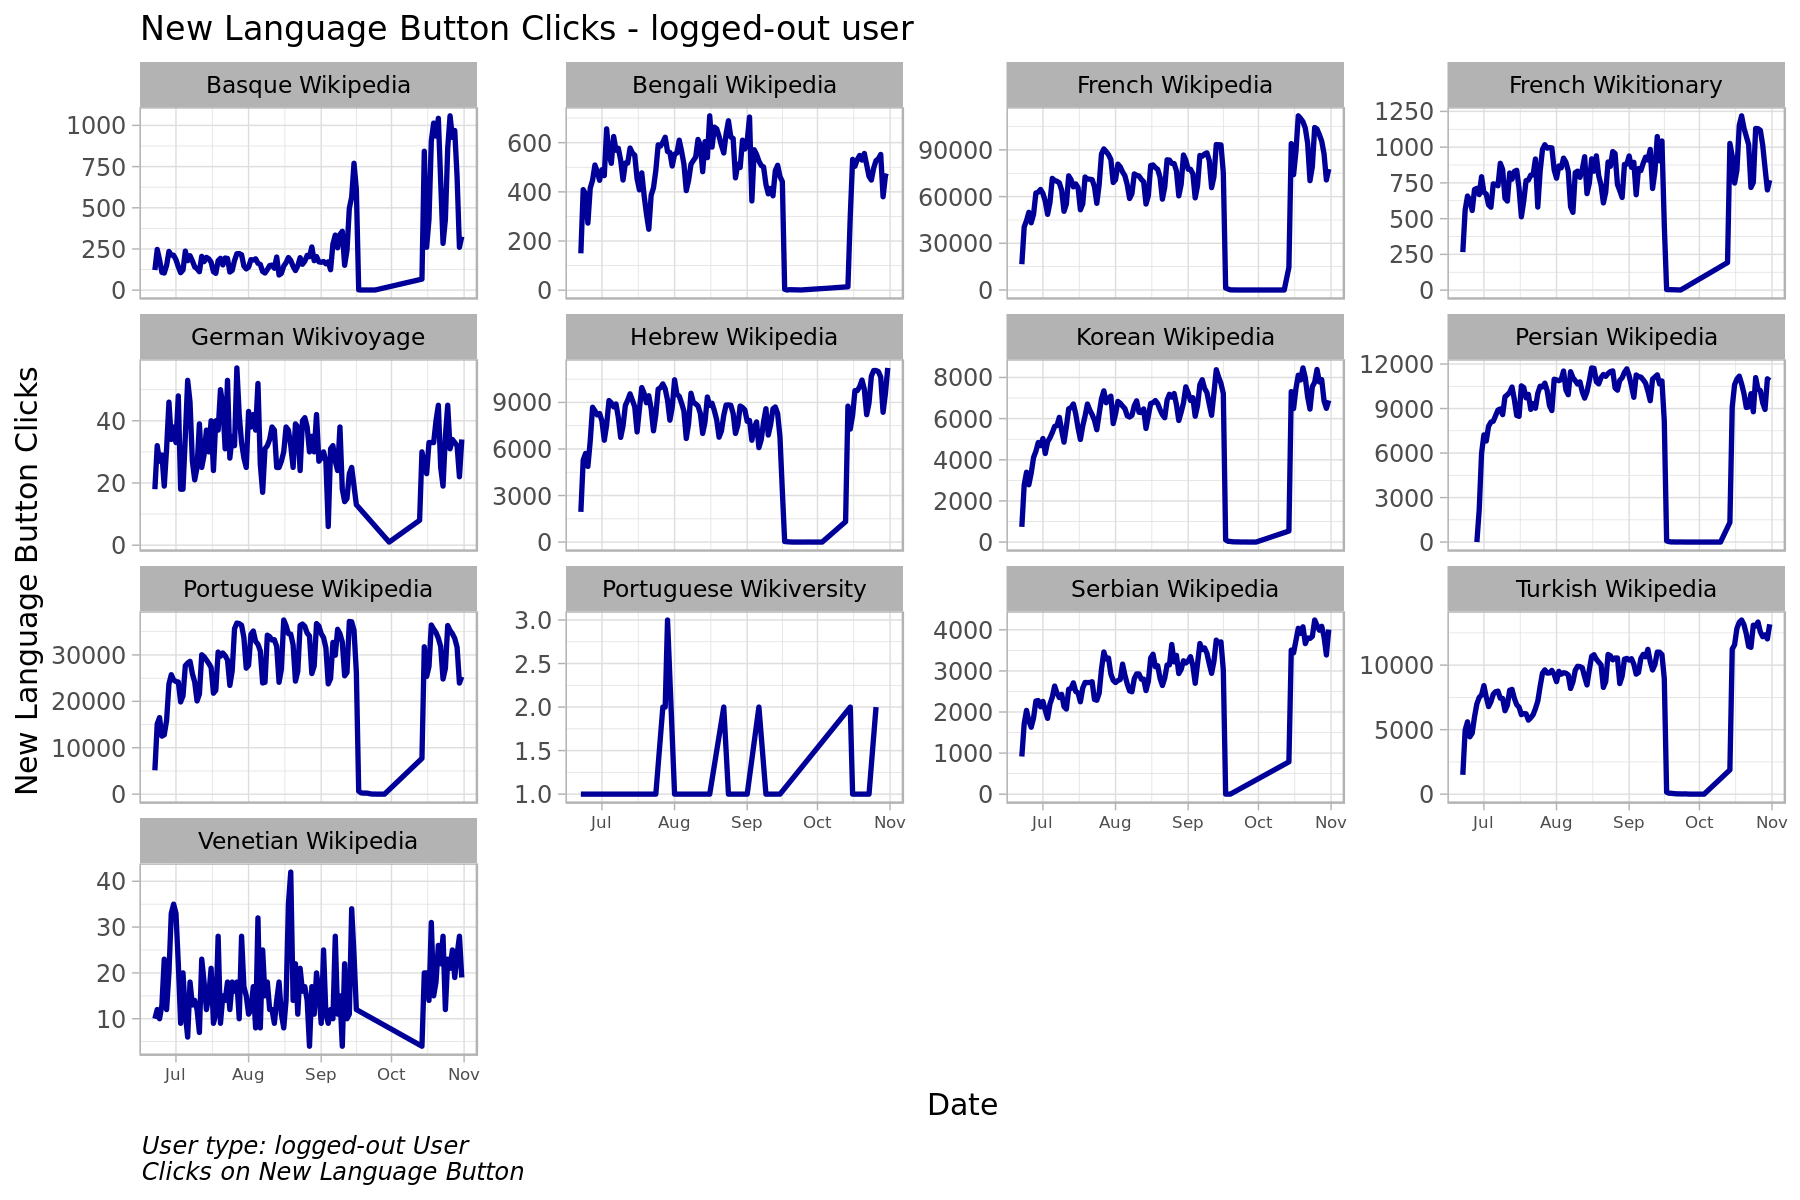

In [95]:
df_button_clicks_g <- ggplot(data=filter(df_new_button_clicks, wiki_name!='NA'), 
                                mapping=aes(x=button_date)) +
geom_line( aes(y=new_button_clicks ), color="#000099" , size = 1.5) +
facet_wrap(~wiki_name,nrow=4,scale = 'free_y')+
labs(title = 'New Language Button Clicks - logged-out user',
     x = 'Date',
     y = 'New Language Button Clicks',
    caption = "User type: logged-out User
Clicks on New Language Button"
    ) + 
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20))

df_button_clicks_g

__Summary__

The new button click events have dropped since 2021-09-16. The number of events recovered since 2021-10-14. It has recovered to the level before the drop as of 2021-10-31. Engineer has tracked down the instrumentation issue in [T291285](https://phabricator.wikimedia.org/T291285).

# Language Link Clicks

__New feature -- language link clicks after new button clicks__
<img src="Figures/new_lang_link.png" width="800" height="600" align="center"/>

In [32]:
query_language_clicks_new <- 
"
-- sessions where new lang button was selected
WITH new_button AS (
SELECT
    MIN(TO_DATE(dt)) as button_date,
    event.web_session_id as session_id,
    event.context as open_context,
    wiki as wiki
FROM event_sanitized.universallanguageselector
WHERE
    year = 2021 and month in (6,7,8,9,10) 
    AND (CONCAT(year,LPAD(month,2,'0'),LPAD(day,2,'0')) between '20210622' and '20211031')
    AND wiki in ('frwiktionary', 'hewiki', 'ptwikiversity', 'frwiki', 
    'euwiki', 'fawiki', 'ptwiki', 'kowiki', 'trwiki', 'srwiki', 'bnwiki', 'dewikivoyage', 'vecwiki')
-- only anonymous users
    AND event.isanon = true
    AND event.action = 'compact-language-links-open'
    AND event.context = 'header'
    AND event.skinVersion = 'latest'
GROUP BY 
    event.web_session_id,
    event.context,
    event.isanon,
    wiki
),

lang_switches AS (
  SELECT
    TO_DATE(dt) as switch_date,
    event.web_session_id as session_id,
    event.context as switch_context,
    wiki as wiki
FROM event_sanitized.universallanguageselector
WHERE
    year = 2021 and month in (6,7,8,9,10) 
    AND (CONCAT(year,LPAD(month,2,'0'),LPAD(day,2,'0')) between '20210622' and '20211031')
    AND wiki in ('frwiktionary', 'hewiki', 'ptwikiversity', 'frwiki', 
    'euwiki', 'fawiki', 'ptwiki', 'kowiki', 'trwiki', 'srwiki', 'bnwiki', 'dewikivoyage', 'vecwiki')
-- only anonymous users
    AND event.isanon =true
    AND event.action = 'language-change'
    AND event.context='content-language-switcher'
    AND event.skinVersion = 'latest'
)

SELECT
    new_button.button_date,
    lang_switches.switch_date,
    new_button.session_id,
    new_button.wiki,
    new_button.open_context,
-- sessions with lang switch that occured after button clicks
    IF(lang_switches.session_id IS NOT NULL AND switch_date >= button_date, 1, 0) AS language_switch,
    lang_switches.switch_context
FROM new_button
LEFT JOIN lang_switches ON
    new_button.session_id = lang_switches.session_id AND
    new_button.wiki = lang_switches.wiki 
"

In [33]:
new_language_link_clicks <-  wmfdata::query_hive(query_language_clicks_new)

Don't forget to authenticate with Kerberos using kinit



In [6]:
#write_csv(new_language_link_clicks, file = 'Data_logout/new_language_link_clicks.csv')

In [7]:
#new_language_link_clicks <- read_csv('Data_logout/new_language_link_clicks.csv')

In [34]:
new_lang_link_clicks_by_date <- new_language_link_clicks  %>%
    filter(language_switch==1) %>%
    group_by( wiki, switch_date) %>%
    summarize(n_events_new_language_change = n(), .groups = 'drop')

new_lang_link_clicks_by_date$switch_date <- as.Date(new_lang_link_clicks_by_date$switch_date)

In [36]:
new_lang_link_clicks_by_date <- new_lang_link_clicks_by_date %>%
mutate(
wiki_name = case_when( #clarfiy Wiki project names
        wiki == 'frwiktionary' ~ "French Wikitionary",
        wiki == 'hewiki' ~ 'Hebrew Wikipedia',
        wiki == 'ptwikiversity' ~ 'Portuguese Wikiversity',
        wiki == 'frwiki'~ "French Wikipedia",
        wiki == 'euwiki' ~ "Basque Wikipedia",
        wiki == 'fawiki' ~ 'Persian Wikipedia',
        wiki == 'ptwiki' ~ 'Portuguese Wikipedia',
        wiki == 'kowiki' ~ 'Korean Wikipedia',
        wiki == 'trwiki' ~ 'Turkish Wikipedia',
        wiki == 'srwiki' ~ 'Serbian Wikipedia',
        wiki == 'bnwiki' ~ 'Bengali Wikipedia',
        wiki == 'dewikivoyage' ~ 'German Wikivoyage',
        wiki == 'vecwiki' ~ 'Venetian Wikipedia'),
)

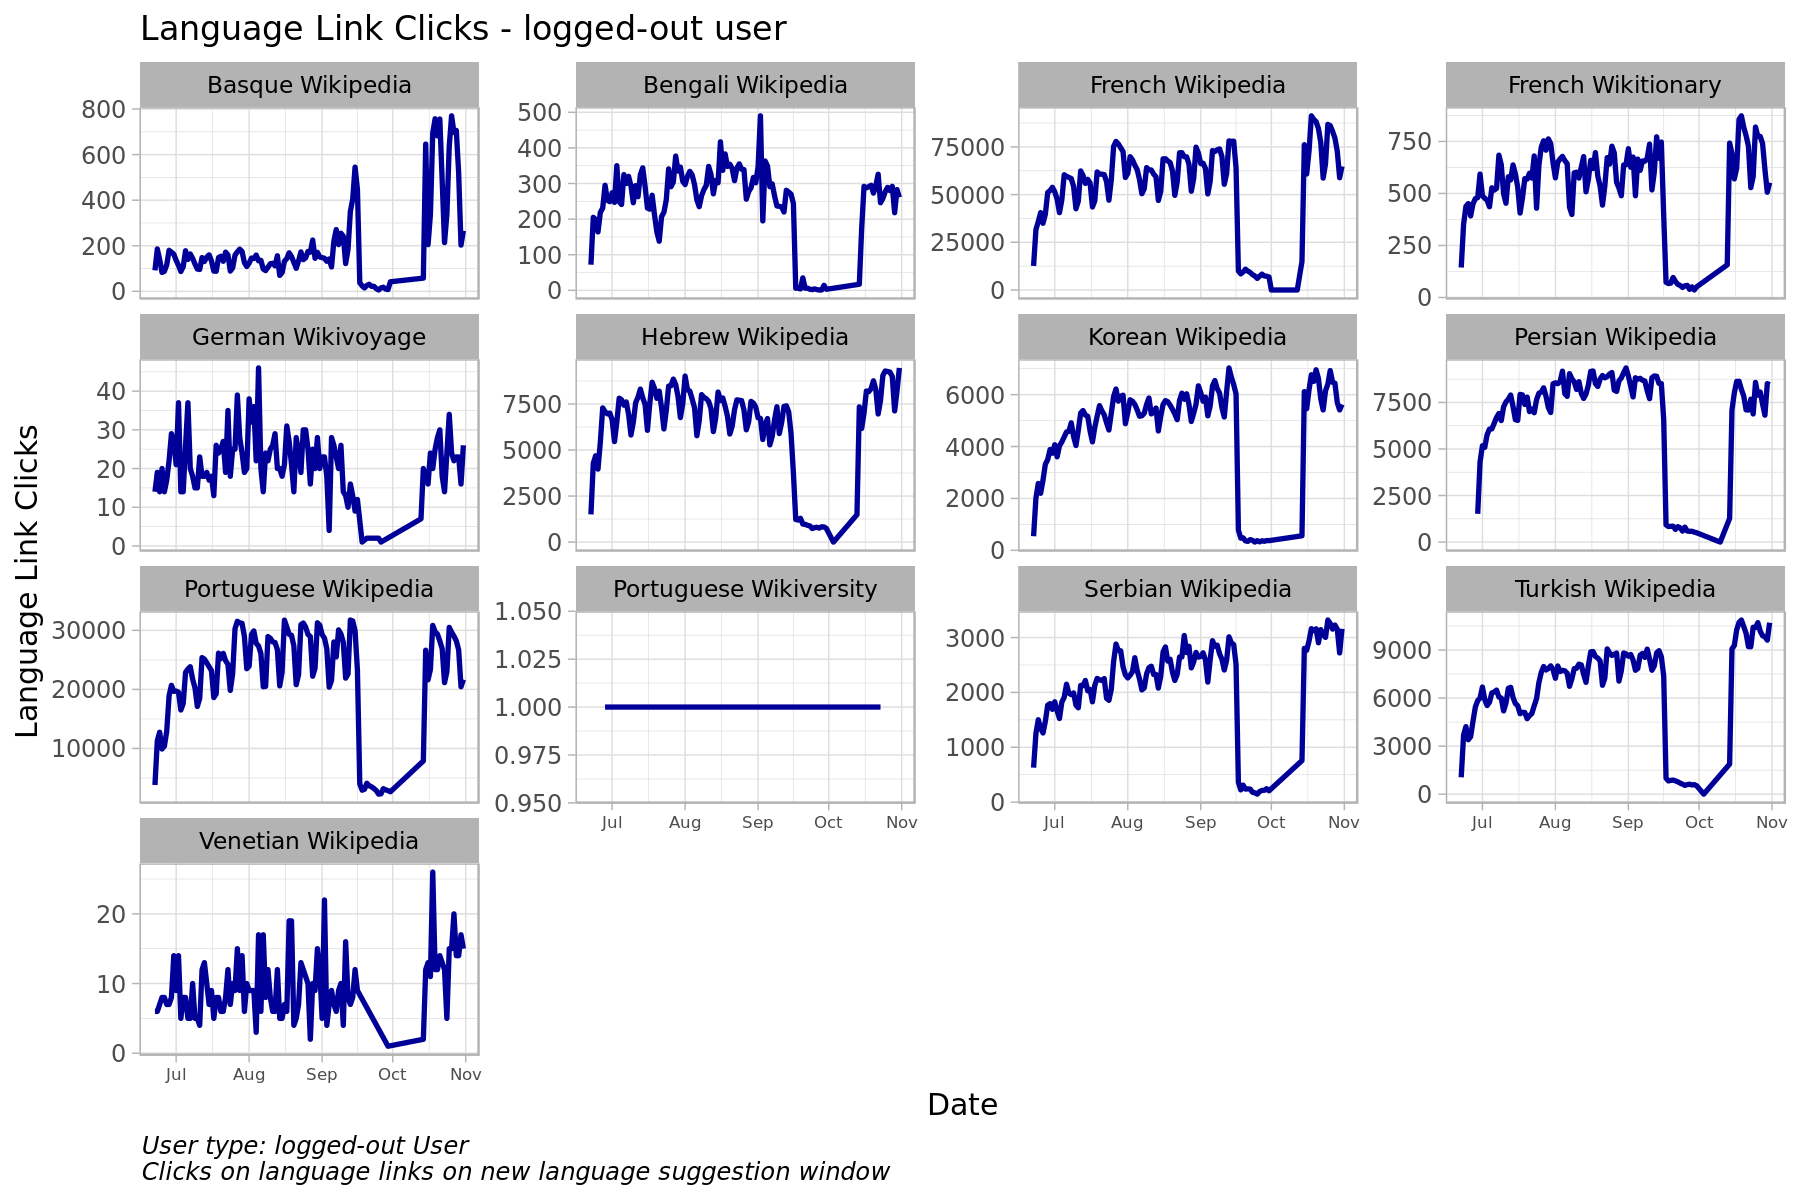

In [37]:
df_lang_clicks_g <- ggplot(data= new_lang_link_clicks_by_date, 
                                mapping=aes(x=switch_date)) +
geom_line(aes(y=n_events_new_language_change ), color="#000099" , size = 1.5) +
facet_wrap(~wiki_name,nrow=4,scale = 'free_y')+
labs(title = 'Language Link Clicks - logged-out user',
     x = 'Date',
     y = 'Language Link Clicks',
    caption = "User type: logged-out User
Clicks on language links on new language suggestion window"
    ) + 
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20))

df_lang_clicks_g

In [47]:
df_lang_clicks_post <- new_lang_link_clicks_by_date %>%
    filter(switch_date >= '2021-10-25' & switch_date <= '2021-10-31') %>%
    group_by(wiki_name) %>%
    summarize(post_weekly_clicks = sum(n_events_new_language_change),  .groups = 'drop')

In [49]:
pre_weekly_language_link_clicks <- read_csv('Data_in/pre_weekly_lang_link_clicks.csv')



── Column specification ────────────────────────────────────────────────────────
cols(
  wiki_name = col_character(),
  pre_weekly_clicks = col_double()
)




In [51]:
df_weekly_lang_link_clicks_prepost <- merge(x = pre_weekly_language_link_clicks, y = df_lang_clicks_post , by = "wiki_name", all.x = TRUE)

In [53]:
df_weekly_lang_link_clicks_prepost[is.na(df_weekly_lang_link_clicks_prepost)] <- 0


In [55]:
df_weekly_lang_link_clicks_prepost <- df_weekly_lang_link_clicks_prepost %>%
  mutate(pct_change=round((post_weekly_clicks-pre_weekly_clicks)/pre_weekly_clicks * 100 , 2))

In [56]:
df_weekly_lang_link_clicks_prepost

wiki_name,pre_weekly_clicks,post_weekly_clicks,pct_change
<chr>,<dbl>,<dbl>,<dbl>
Basque Wikipedia,5923,3797,-35.89
Bengali Wikipedia,5034,1900,-62.26
French Wikipedia,842825,532033,-36.88
French Wikitionary,9115,4780,-47.56
German Wikivoyage,351,168,-52.14
Hebrew Wikipedia,89210,61543,-31.01
Korean Wikipedia,76985,42988,-44.16
Persian Wikipedia,90729,55715,-38.59
Portuguese Wikipedia,301197,186248,-38.16


In [76]:
df_weekly_lang_link_clicks_prepost_L <- pivot_longer(df_weekly_lang_link_clicks_prepost[1:3], 2:3, names_to = "category", values_to = "clicks")


In [79]:
df_weekly_lang_link_clicks_prepost_L$category <- factor(df_weekly_lang_link_clicks_prepost_L$category,levels = c("pre_weekly_clicks", "post_weekly_clicks"))

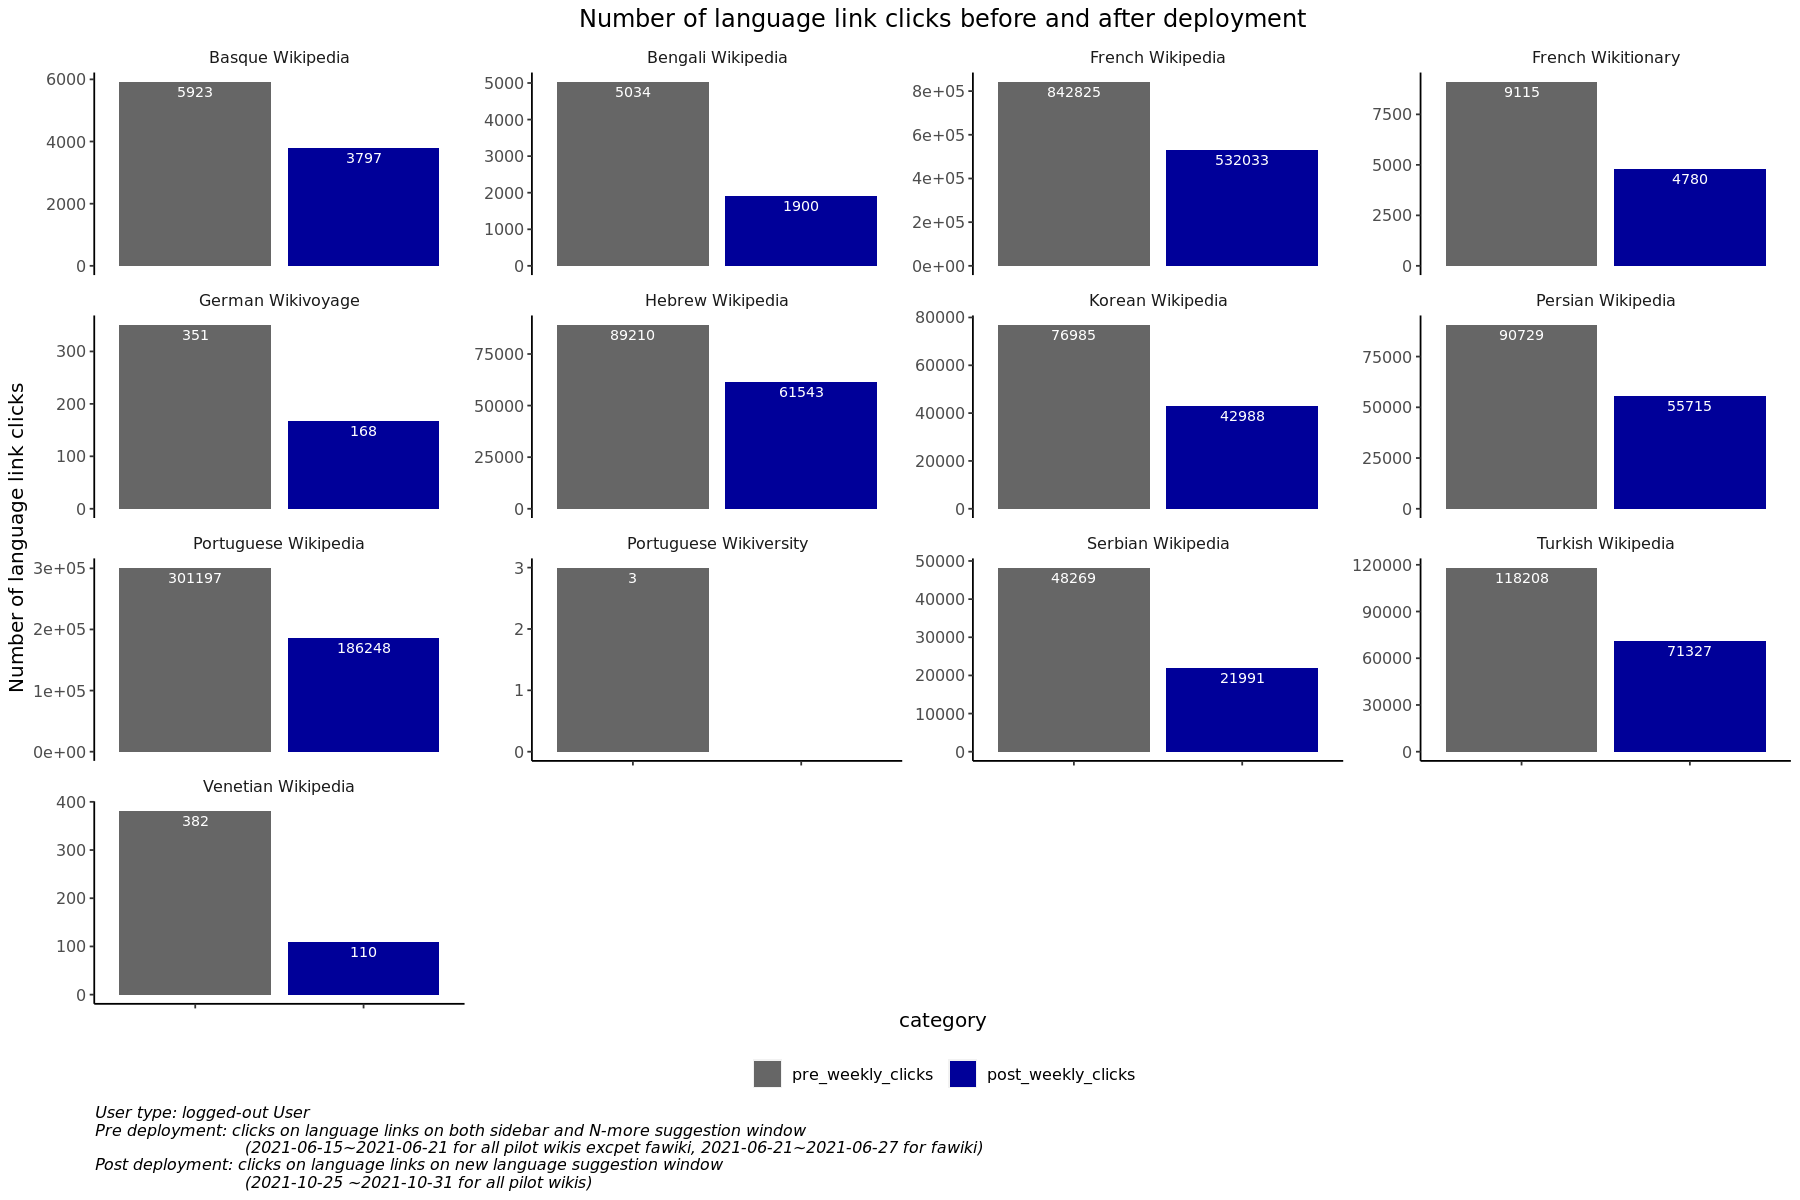

In [91]:
lang_clicks_barchart <- df_weekly_lang_link_clicks_prepost_L %>%
        ggplot(aes(x = category, y= clicks, fill=category)) +
        geom_bar(stat="identity", position = 'dodge') +
        geom_text(aes(label = paste(clicks)), color = "white", position = position_dodge(0.9), vjust = 1.5, size = 3) +
        facet_wrap(~wiki_name, scale = 'free_y') +
        labs (
              y = "Number of language link clicks",
             title = "Number of language link clicks before and after deployment",
             caption = "User type: logged-out User
Pre deployment: clicks on language links on both sidebar and N-more suggestion window 
                              (2021-06-15~2021-06-21 for all pilot wikis excpet fawiki, 2021-06-21~2021-06-27 for fawiki)
Post deployment: clicks on language links on new language suggestion window 
                              (2021-10-25 ~2021-10-31 for all pilot wikis)") +
     scale_fill_manual(values= c( "#666666",  "#000099"), name = "")  +
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            axis.text.x = element_blank(),
            plot.caption = element_text(hjust = 0, face= "italic"),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=12),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")
lang_clicks_barchart

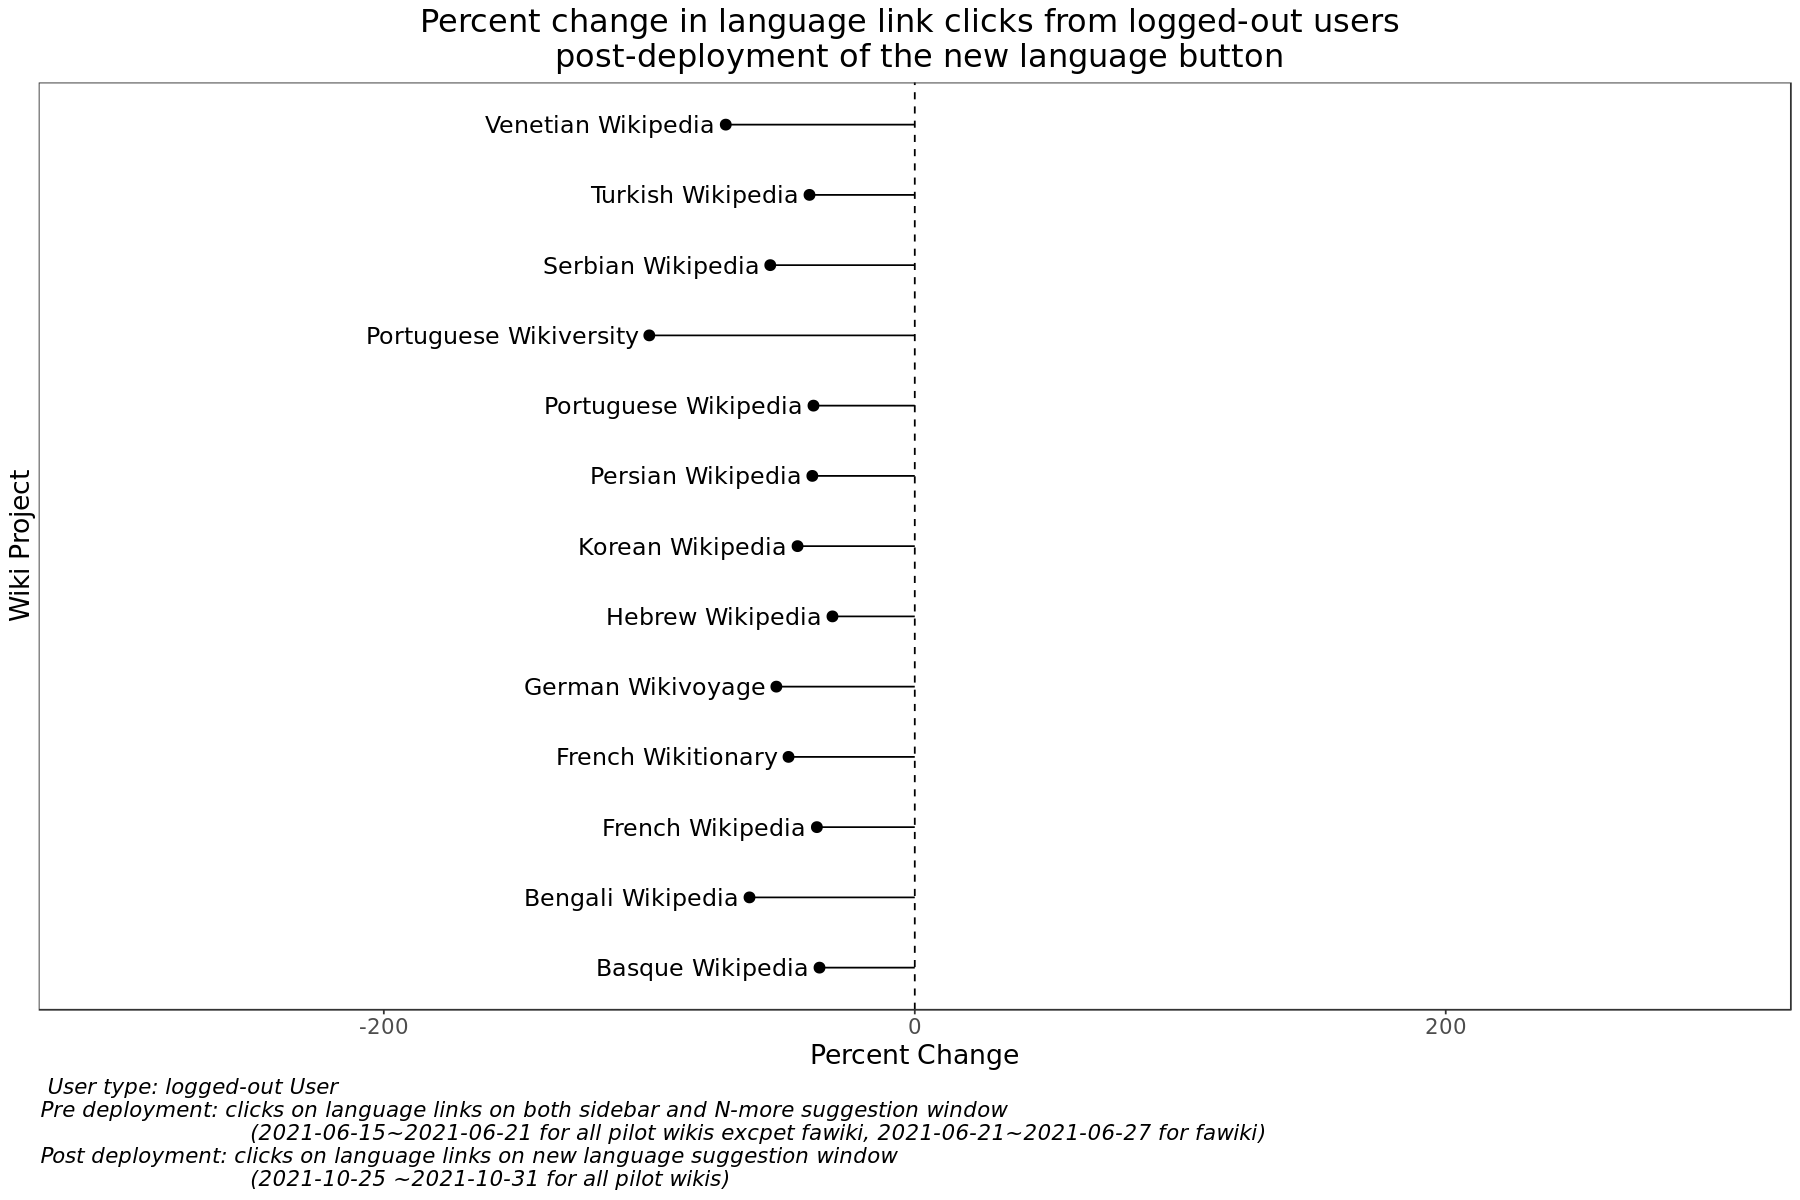

In [72]:
pct_g <- df_weekly_lang_link_clicks_prepost %>%
        ggplot() +
        geom_hline(yintercept = 0, linetype = "dashed") +
        geom_pointrange(
            aes(x = wiki_name, ymin = 0, ymax = pct_change, y = pct_change)
        ) +
        geom_text(
            aes(
                y = pct_change + ifelse(pct_change < 0, -4, 4),
                x = wiki_name, label = wiki_name,
                hjust = ifelse(pct_change < 0, "right", "left")
            ),
            size = 5
        ) +
        scale_x_discrete(breaks = NULL) +
        coord_flip(ylim = c(-300, 300)) +
         labs (x = "Wiki Project",
                y = "Percent Change",
             title = "Percent change in language link clicks from logged-out users \n post-deployment of the new language button",
              caption = " User type: logged-out User
Pre deployment: clicks on language links on both sidebar and N-more suggestion window 
                              (2021-06-15~2021-06-21 for all pilot wikis excpet fawiki, 2021-06-21~2021-06-27 for fawiki)
Post deployment: clicks on language links on new language suggestion window 
                              (2021-10-25 ~2021-10-31 for all pilot wikis)"
              ) +
        theme_bw() +
        theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            plot.caption = element_text(hjust = 0, face= "italic"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=16)) 
      
pct_g

__Average percent change__

In [92]:
mean(df_weekly_lang_link_clicks_prepost$pct_change)

[1] -50.15

__Summary__

Comparing the recent week (2021-10-25 ~ 2021-10-31) after the deployment and data recovery  to the week before the deployment, there was an average 50.15% decrease[^1] in total weekly clicks on language links by logged-out users on the early adopter wikis. In the [previous report](https://nbviewer.org/github/jenniferwang-wmf/Web_language_switch/blob/master/Language_switching_logout_user_before_after_report.ipynb), the decrease in the week of the 16th day to the 23th day after the deployment is 61.1%. 

It seems new feature adoption is catching up slowly. 

[^1]: Calculated by taking the average of the percent changes observed on each early adopter wiki.

# Input Language Link Clicks

__New feature -- input language link clicks after new button clicks__
<img src="Figures/old_input_lang.png" width="600" height="400" align="center"/>

In [38]:
query_input_language_change_new <- 
"
-- sessions where new lang button was selected
WITH new_button AS (
SELECT
    MIN(TO_DATE(dt)) as button_date,
    event.web_session_id as session_id,
    event.context as open_context,
    wiki as wiki
FROM event_sanitized.universallanguageselector
WHERE
    year = 2021 and month in (6,7,8,9,10) 
    AND (CONCAT(year,LPAD(month,2,'0'),LPAD(day,2,'0')) between '20210622' and '20211031')
    AND wiki in ('frwiktionary', 'hewiki', 'ptwikiversity', 'frwiki', 
    'euwiki', 'fawiki', 'ptwiki', 'kowiki', 'trwiki', 'srwiki', 'bnwiki', 'dewikivoyage', 'vecwiki')
-- only anonymous users
    AND event.isanon = true
    AND event.action = 'compact-language-links-open'
    AND event.context = 'header'
    AND event.skinVersion = 'latest'
GROUP BY 
    event.web_session_id,
    event.context,
    wiki
),

input_lang_switches AS (
  SELECT
    TO_DATE(dt) as switch_date,
    event.web_session_id as session_id,
    event.context as switch_context,
    wiki as wiki
FROM event_sanitized.universallanguageselector
WHERE
    year = 2021 and month in (6,7,8,9,10) 
    AND (CONCAT(year,LPAD(month,2,'0'),LPAD(day,2,'0')) between '20210622' and '20211031')
    AND wiki in ('frwiktionary', 'hewiki', 'ptwikiversity', 'frwiki', 
    'euwiki', 'fawiki', 'ptwiki', 'kowiki', 'trwiki', 'srwiki', 'bnwiki', 'dewikivoyage', 'vecwiki')
-- only anonymous users
    AND event.isanon = true
    AND event.action='ime-change'
    AND event.skinVersion = 'latest'
)

SELECT
    new_button.button_date,
    input_lang_switches.switch_date,
    new_button.session_id,
    new_button.wiki,
    new_button.open_context,
-- sessions with lang switch that occured after button clicks
    IF(input_lang_switches.session_id IS NOT NULL AND switch_date >= button_date, 1, 0) AS language_switch,
    input_lang_switches.switch_context
FROM new_button
LEFT JOIN input_lang_switches ON
    new_button.session_id = input_lang_switches.session_id AND
    new_button.wiki = input_lang_switches.wiki
"

In [39]:
new_input_lang_clicks <-  wmfdata::query_hive(query_input_language_change_new)

Don't forget to authenticate with Kerberos using kinit



In [ ]:
#write_csv(new_input_lang_clicks, file = 'Data_logout/new_input_lang_clicks.csv')

In [40]:
new_input_lang_clicks_by_date <- new_input_lang_clicks %>%
    filter(language_switch==1) %>%
    group_by( wiki, switch_date) %>%
    summarize(new_input_language_clicks = sum(language_switch), .groups='drop')

new_input_lang_clicks_by_date$switch_date <- as.Date(new_input_lang_clicks_by_date$switch_date, format = "%Y-%m-%d")

In [41]:
new_input_lang_clicks_by_date <- new_input_lang_clicks_by_date %>%
mutate(
wiki_name = case_when( #clarfiy Wiki project names
        wiki == 'frwiktionary' ~ "French Wikitionary",
        wiki == 'hewiki' ~ 'Hebrew Wikipedia',
        wiki == 'ptwikiversity' ~ 'Portuguese Wikiversity',
        wiki == 'frwiki'~ "French Wikipedia",
        wiki == 'euwiki' ~ "Basque Wikipedia",
        wiki == 'fawiki' ~ 'Persian Wikipedia',
        wiki == 'ptwiki' ~ 'Portuguese Wikipedia',
        wiki == 'kowiki' ~ 'Korean Wikipedia',
        wiki == 'trwiki' ~ 'Turkish Wikipedia',
        wiki == 'srwiki' ~ 'Serbian Wikipedia',
        wiki == 'bnwiki' ~ 'Bengali Wikipedia',
        wiki == 'dewikivoyage' ~ 'German Wikivoyage',
        wiki == 'vecwiki' ~ 'Venetian Wikipedia'),
)

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



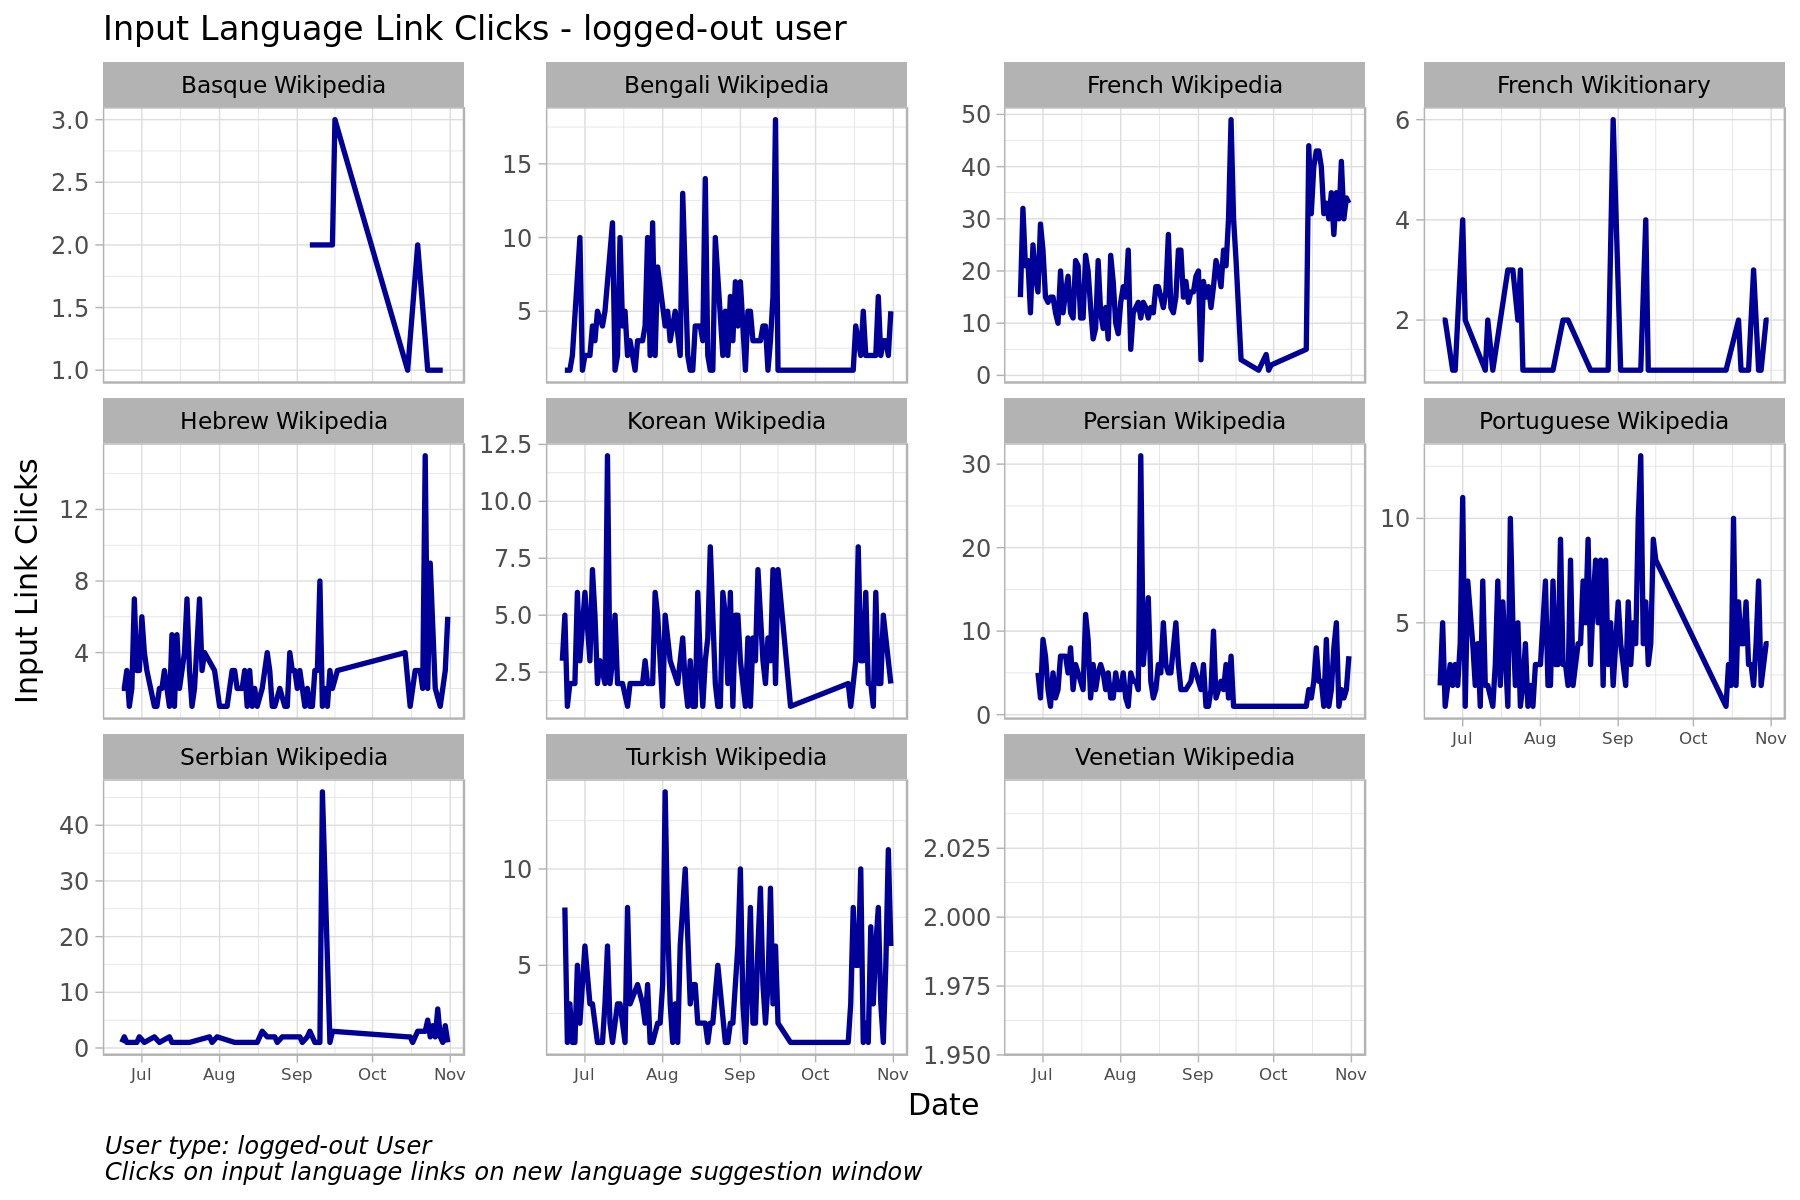

In [43]:
input_lang_click_g <- ggplot(data=new_input_lang_clicks_by_date, 
                                mapping=aes(x=switch_date)) +
geom_line(aes(y=new_input_language_clicks) , color="#000099" , size = 1.5) +
facet_wrap(~wiki_name,nrow=3,scale = 'free_y')+
labs(title = 'Input Language Link Clicks - logged-out user',
     x = 'Date',
     y = 'Input Link Clicks',
        caption = "User type: logged-out User
Clicks on input language links on new language suggestion window") + 
theme_light(base_size = 18) +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20))

input_lang_click_g


__Summary__

In the [previous report](https://nbviewer.org/github/jenniferwang-wmf/Web_language_switch/blob/master/Language_switching_logout_user_before_after_report.ipynb), there was an average 69.9% increase[^2] in daily average clicks on input language links by logged-out users on the early adopter wikis following deployment of the new language feature. The average is driven upwards mainly by several wikis with low daily activities. 

The recent trend shows:
1. The number of clicks dropped between 2021-09-16 and 2021-10-14 due to the instrumentation issue mentioned at the beginning.   
2. Now the number of clicks has recovered to the level before the issue was introduced.   
3. The trend of input language clicks is unclear due to the low activity on most pilot wikis.  


[^2]: Calculated by taking the average of the percent changes observed on each early adopter wiki, excluding German Wikivoyage and Venetian Wikipedia for 0 click in pre-deployment period.   
